#Vizualizálás
A sentiment elemzés és a témamodellezés eredményeinek vizualizálása.
A kód tartalmazza a text_analysis nagy részét is.

In [1]:
import pandas as pd

import os
import re

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics

import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer

import matplotlib.pyplot as plt
import seaborn as sns

import nltk

nltk.download('all')

from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, SnowballStemmer

def prepare_text(text):
    text = text.lower()  # szöveg kisbetűssé alakítása
    text = re.sub(r'[^\w\s]', '', text)  # írásjelek eltávolítása
    text = re.sub(r'\d+', '', text)  # számok eltávolítása
    text = re.sub(r'\s+', ' ', text).strip()  # extra szóközök eltávolítása

    return text

stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def tokenizer_stop_words_lemmatize(text):
    tokens = word_tokenize(text)
    filtered_tokens = [word for word in tokens if word not in stop_words]
    final_tokens = [lemmatizer.lemmatize(word, pos='v') for word in filtered_tokens]
    return final_tokens

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/alpino.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_eng to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_eng.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_ru.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_rus to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |  

In [3]:
train_file_path = 'cleaned_train(1).csv'
test_file_path = 'cleaned_test.csv'

In [5]:
train_data = pd.read_csv(train_file_path, index_col=0)
train_data = train_data.drop(labels=['title', 'text'], axis=1)
train_data.head(10)

,sentiment,title_tokens,text_tokens
0,2,"['stun', 'even', 'nongamer']","['sound', 'track', 'beautiful', 'paint', 'sene..."
1,2,"['best', 'soundtrack', 'ever', 'anything']","['im', 'read', 'lot', 'review', 'say', 'best',..."
2,2,['amaze'],"['soundtrack', 'favorite', 'music', 'time', 'h..."
3,2,"['excellent', 'soundtrack']","['truly', 'like', 'soundtrack', 'enjoy', 'vide..."
4,2,"['remember', 'pull', 'jaw', 'floor', 'hear']","['youve', 'play', 'game', 'know', 'divine', 'm..."
5,2,"['absolute', 'masterpiece']","['quite', 'sure', 'actually', 'take', 'time', ..."
6,1,"['buyer', 'beware']","['selfpublished', 'book', 'want', 'know', 'why..."
7,2,"['glorious', 'story']","['love', 'whisper', 'wicked', 'saint', 'story'..."
8,2,"['five', 'star', 'book']","['finish', 'read', 'whisper', 'wicked', 'saint..."
9,2,"['whisper', 'wicked', 'saint']","['easy', 'read', 'book', 'make', 'want', 'keep..."


In [6]:
test_data = pd.read_csv(test_file_path, index_col=0)
test_data = test_data.drop(labels=['title', 'text'], axis=1)
test_data.head(10)

,sentiment,title_tokens,text_tokens
0,2,"['great', 'cd']","['lovely', 'pat', 'one', 'great', 'voice', 'ge..."
1,2,"['one', 'best', 'game', 'music', 'soundtracks'...","['despite', 'fact', 'play', 'small', 'portion'..."
2,1,"['batteries', 'die', 'within', 'year']","['buy', 'charger', 'jul', 'work', 'ok', 'desig..."
3,2,"['work', 'fine', 'maha', 'energy', 'better']","['check', 'maha', 'energys', 'website', 'power..."
4,2,"['great', 'nonaudiophile']","['review', 'quite', 'bite', 'combo', 'players'..."
5,1,"['dvd', 'player', 'crap', 'one', 'year']","['also', 'begin', 'incorrect', 'disc', 'proble..."
6,1,"['incorrect', 'disc']","['love', 'style', 'couple', 'years', 'dvd', 'g..."
7,1,"['dvd', 'menu', 'select', 'problems']","['scroll', 'dvd', 'menu', 'set', 'vertically',..."
8,2,"['unique', 'weird', 'orientalia']","['exotic', 'tales', 'orient', 'dr', 'shen', 'f..."
9,1,"['ultimate', 'guide']","['firstlyi', 'enjoy', 'format', 'tone', 'book'..."


In [7]:
train_data['text_tokens'] = train_data['text_tokens'].fillna('')
test_data['text_tokens'] = test_data['text_tokens'].fillna('')

vectorizer = TfidfVectorizer()

X_train = vectorizer.fit_transform(train_data['text_tokens'])
y_train = train_data['sentiment']

X_test = vectorizer.transform(test_data['text_tokens'])
y_test = test_data['sentiment']

In [8]:
classifier = MultinomialNB(alpha=0.5)
classifier.fit(X_train, y_train)

MultinomialNB(alpha=0.5)

In [32]:
y_pred = classifier.predict(X_test)

In [33]:
print("Pontosság:", metrics.accuracy_score(y_test, y_pred))

Pontosság: 0.8163386404245673


In [34]:
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.81      0.83      0.82     74261
           2       0.83      0.81      0.82     75727

    accuracy                           0.82    149988
   macro avg       0.82      0.82      0.82    149988
weighted avg       0.82      0.82      0.82    149988



##Értékelések eloszlása
Train és Test dataframe-ek összefűzése, pozitív/negatív értékelések eloszlásának megjelenítése diagramon.

In [9]:
frames = [train_data, test_data]
df = pd.concat(frames)
df['sentiment'] = df['sentiment'].apply(lambda x: 'negative' if x == 1 else 'positive')

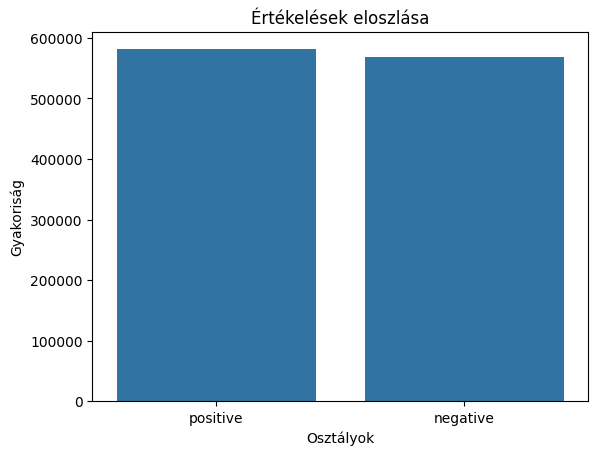

In [ ]:
sns.countplot(x='sentiment', data=df)
plt.title("Értékelések eloszlása")
plt.xlabel("Osztályok")
plt.ylabel("Gyakoriság")
plt.show()

#Szófelhő a pozitív és a negatív értékelésekben gyakran használt szavakból


In [10]:
#pozitív és negatív értékelések szövegeinek szétválasztása
positive_reviews = df[df['sentiment'] == 'positive']['text_tokens']
negative_reviews = df[df['sentiment'] == 'negative']['text_tokens']


In [12]:
from itertools import chain
import ast
#Szavak tárolása egy-egy nagy listában
big_positive_list = list(chain.from_iterable(positive_reviews.apply(ast.literal_eval)))
big_negative_list = list(chain.from_iterable(negative_reviews.apply(ast.literal_eval)))

In [27]:
from collections import Counter
#Szavak gyakoriságának számlálása
positive_word_counts = Counter(big_positive_list)
negative_word_counts = Counter(big_negative_list)

In [29]:
#Mindkét halmazban jelen lévő szavak eltávolítása
common_words = set(positive_word_counts.keys()) & set(negative_word_counts.keys())

positive_word_counts = {word: count for word, count in positive_word_counts.items() if word not in common_words}
negative_word_counts = {word: count for word, count in negative_word_counts.items() if word not in common_words}

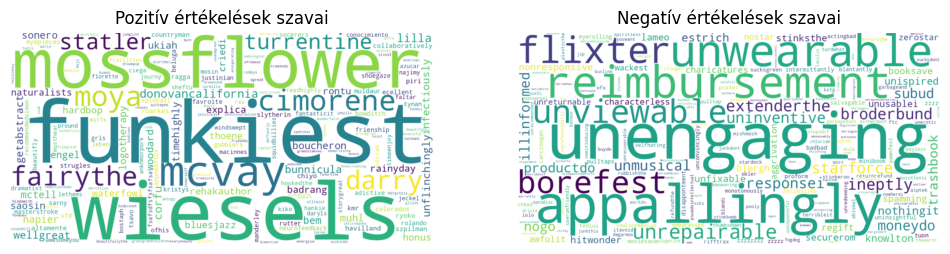

In [31]:
from wordcloud import WordCloud

positive_wordcloud = WordCloud(width=1600, height=800, background_color="white").generate_from_frequencies(positive_word_counts)
negative_wordcloud = WordCloud(width=1600, height=800, background_color="white").generate_from_frequencies(negative_word_counts)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(positive_wordcloud, interpolation='bilinear')
plt.title('Pozitív értékelések szavai')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(negative_wordcloud, interpolation='bilinear')
plt.title('Negatív értékelések szavai')
plt.axis('off')

plt.show()

#Model teljesítmény vizualizálása

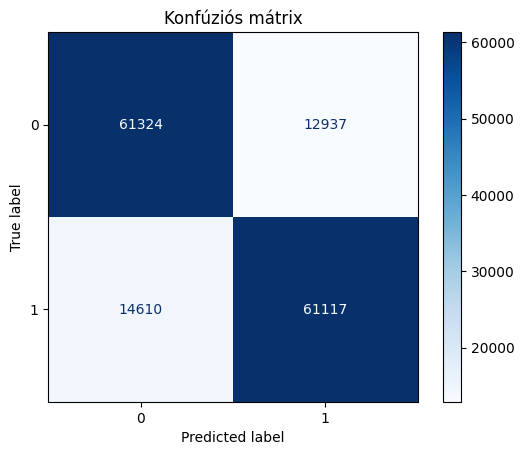

In [35]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import numpy as np

cm = confusion_matrix(y_test, y_pred)
cm_display = ConfusionMatrixDisplay(confusion_matrix=cm)
cm_display.plot(cmap='Blues')
plt.title("Konfúziós mátrix")
plt.show()

#TF-IDF mátrix vizualizálása

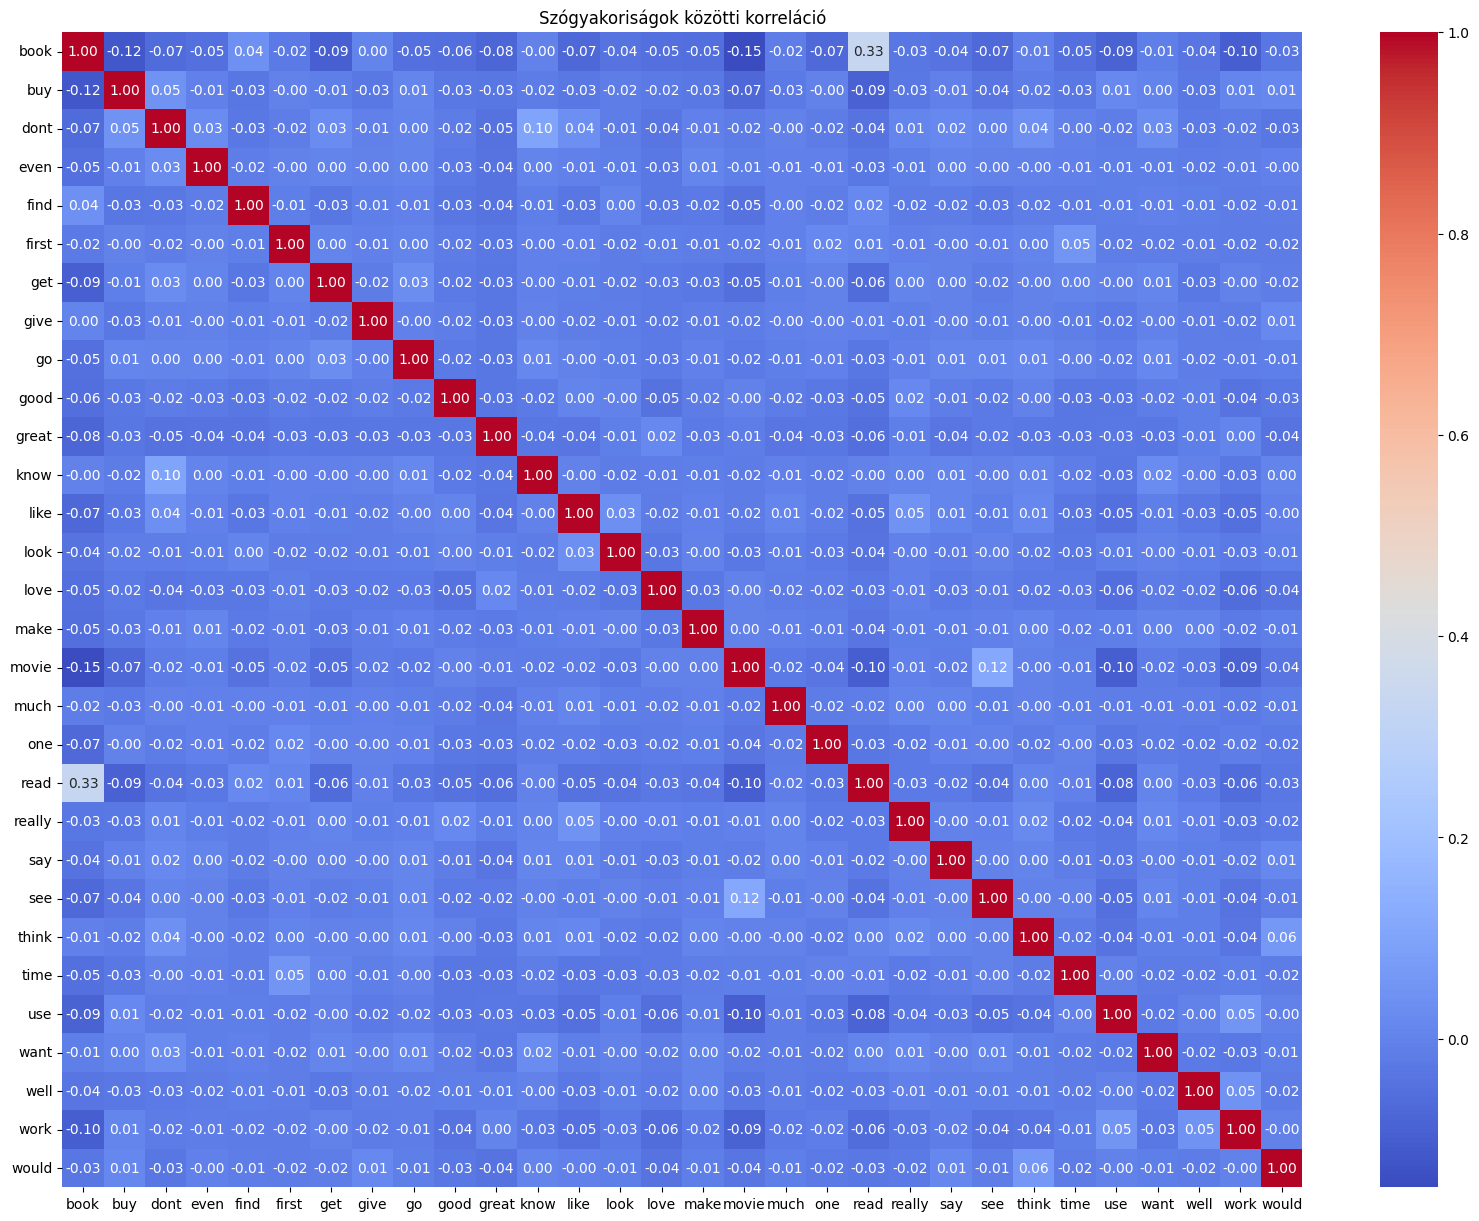

In [42]:
from sklearn.feature_extraction.text import TfidfVectorizer
import seaborn as sns
import pandas as pd

vectorizer = TfidfVectorizer(max_features=30)  # Kiválasztunk 30 legfontosabb szót
X = vectorizer.fit_transform(df['text_tokens'])

# A szógyakoriság mátrix átalakítása DataFrame-be
tfidf_df = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())

plt.figure(figsize=(20, 15))
sns.heatmap(tfidf_df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Szógyakoriságok közötti korreláció")
plt.show()

#Model predikciós valószínűségek megjelenítése

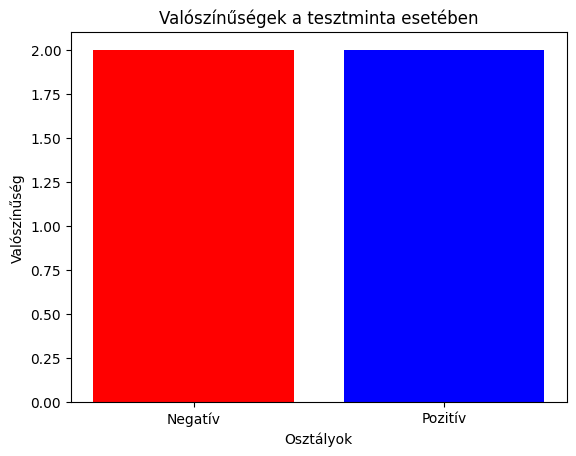

In [47]:
# Ha a modell visszaadja a valószínűségeket
probabilities_sample = y_pred[0]

# Vizualizáció: oszlopdiagram a valószínűségekről
plt.bar([0, 1], probabilities_sample, color=['red', 'blue'])
plt.xlabel('Osztályok')
plt.ylabel('Valószínűség')
plt.title('Valószínűségek a tesztminta esetében')
plt.xticks([0, 1], ['Negatív', 'Pozitív'])
plt.show()

#Termék értékelések előrejelzésének szóródása

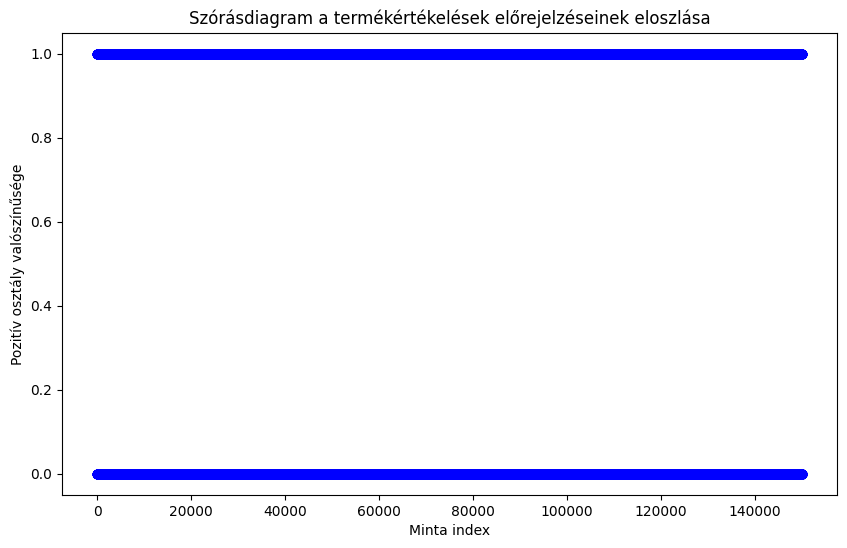

Pozitív osztály valószínűsége százalékosan: 49.37%


In [56]:
# Az előrejelzett valószínűségek
prob_positive = y_pred==2 # 2-es osztály (pozitív) valószínűsége

percentage_positive = (prob_positive.sum() / len(prob_positive)) * 100

# Szórásdiagram az előrejelzett valószínűségekről
plt.figure(figsize=(10, 6))
plt.scatter(range(len(prob_positive)), prob_positive, alpha=0.7, color='blue')
plt.xlabel('Minta index')
plt.ylabel('Pozitív osztály valószínűsége')
plt.title('Szórásdiagram a termékértékelések előrejelzéseinek eloszlása')
plt.show()

print(f"Pozitív osztály valószínűsége százalékosan: {percentage_positive:.2f}%")